# Formative Assignment: Advanced Linear Algebra (PCA)
This notebook will guide you through the implementation of Principal Component Analysis (PCA). Fill in the missing code and provide the required answers in the appropriate sections. You will work with a dataset that is Africanized .

Make sure to display outputs for each code cell when submitting.

### Step 1: Load and Standardize the Data
Before applying PCA, we must standardize the dataset. Standardization ensures that all features have a mean of 0 and a standard deviation of 1, which is essential for PCA.
Fill in the code to standardize the dataset.

STRICTLY - Write code that implements standardization based on the image below

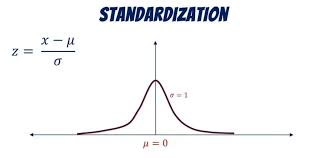


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading the fuel data set i chose
df = pd.read_csv(r"C:\Users\GOLDEN K TECHNOLOGY\Downloads\Template_PCA_Formative\fuel_econ.csv")

# Keep numeric columns necessary for pca
numeric_df = df.select_dtypes(include=[np.number])

# Handle missing values by filling with column mean
numeric_df = numeric_df.fillna(numeric_df.mean())

# Convert to NumPy array
data = numeric_df.values

# -formula, pretty standard
data_mean = np.mean(data, axis=0)
data_std = np.std(data, axis=0)

standardized_data = (data - data_mean) / data_std

# show the 5 rows
standardized_data[:5]


array([[-1.73714048, -1.47583548,  0.28310163,  0.65053594,  1.46709627,
        -1.21737766, -0.85996012, -0.85242986, -1.29062982, -1.39247459,
        -1.00832279,  1.02283829, -0.95057953, -0.94575548],
       [-1.73668367, -1.47583548, -0.78181585, -0.72799833,  1.86476224,
        -1.21737766,  0.00642675, -0.11743408,  0.18494654, -0.03920038,
         0.07186379, -0.29854998,  0.1886082 ,  0.1942578 ],
       [-1.73622685, -1.47583548,  0.28310163,  0.49736547,  1.86476224,
        -1.21737766, -0.69441634, -0.75324472, -0.5920197 , -0.85174957,
        -0.68633929,  0.56793413, -0.38098566, -0.37574884],
       [-1.73577004, -1.47583548,  0.28310163,  0.49736547,  1.86476224,
        -1.21737766, -0.78280029, -0.830286  , -0.82738386, -1.02758796,
        -0.81865124,  0.752062  , -0.38098566, -0.37574884],
       [-1.73531322, -1.47583548, -0.78181585, -0.42165738, -0.62727784,
         0.73489021,  0.47108294,  0.43314691,  0.96751585,  0.99253135,
         0.64805881, -0.72

### Step 3: Calculate the Covariance Matrix
The covariance matrix helps us understand how the features are related to each other. It is a key component in PCA.

In [ ]:
# Covariance matrix as columns 
cov_matrix = np.cov(standardized_data, rowvar=False)
cov_matrix


array([[ 1.00025458,  0.98591866, -0.06011148, -0.07468488, -0.00657025,
        -0.02195656,  0.09182316,  0.09124849,  0.0906161 ,  0.09538375,
         0.09382686, -0.09974229, -0.1279056 , -0.12235207],
       [ 0.98591866,  1.00025458, -0.05532701, -0.07044161,  0.00623397,
        -0.03365174,  0.06806739,  0.06675938,  0.07330836,  0.07766039,
         0.07201181, -0.0811853 , -0.1498676 , -0.14517775],
       [-0.06011148, -0.05532701,  1.00025458,  0.93411019,  0.24763384,
        -0.00426546, -0.69327904, -0.66619842, -0.76646982, -0.77169964,
        -0.73821112,  0.84848979, -0.78405759, -0.78201448],
       [-0.07468488, -0.07044161,  0.93411019,  1.00025458,  0.2594021 ,
         0.02207729, -0.71366074, -0.6863403 , -0.78418374, -0.78865771,
        -0.75859024,  0.85559254, -0.7936343 , -0.79141752],
       [-0.00657025,  0.00623397,  0.24763384,  0.2594021 ,  1.00025458,
        -0.66581137, -0.27817962, -0.27261515, -0.29688365, -0.29858023,
        -0.29095711,  0.28

### Step 4: Perform Eigendecomposition
Eigendecomposition of the covariance matrix will give us the eigenvalues and eigenvectors, which are essential for PCA.
Fill in the code to compute the eigenvalues and eigenvectors of the covariance matrix.

In [3]:
# Eigendecomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

eigenvalues, eigenvectors


(array([8.95720924e+00, 2.06777956e+00, 1.59364217e+00, 6.70587666e-01,
        3.01684118e-01, 1.61017548e-01, 1.25550471e-01, 6.40205207e-02,
        3.23528963e-02, 1.36962433e-02, 9.24627112e-03, 4.24637785e-03,
        2.14358185e-03, 3.87485886e-04]),
 array([[ 1.89952516e-02, -6.87675276e-01,  7.65365183e-02,
          1.83729680e-02, -1.42115022e-02,  7.02789695e-02,
          1.14861126e-01,  4.01097554e-03, -1.15143583e-01,
         -6.95538857e-01, -6.83326435e-02,  2.10633586e-02,
         -7.10578367e-03,  6.07618642e-04],
        [ 1.24694065e-02, -6.89503292e-01,  6.88439505e-02,
         -9.43831862e-03, -1.35600088e-02,  3.37955333e-02,
          8.53170135e-02, -7.51768613e-03, -5.48830131e-02,
          7.10425085e-01,  5.58369479e-02, -9.48384475e-03,
         -3.26885432e-04, -3.98397374e-03],
        [-2.81632694e-01,  1.98550575e-02,  5.61398643e-02,
          6.00933196e-01,  9.71151716e-02, -7.09369930e-02,
          2.53817629e-01, -6.79764243e-01,  1.19688616

### Step 5: Sort Principal Components
Sort the eigenvectors based on their corresponding eigenvalues in descending order. The higher the eigenvalue, the more important the eigenvector.
Complete the code to sort the eigenvectors and print the sorted components.

<a url ='https://www.youtube.com/watch?v=vaF-1xUEXsA&t=17s'>How Is Explained Variance Used In PCA?'<a/>

In [4]:
# Sort eigenvalues in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]

# Sort eigenvectors accordingly
sorted_eigenvectors = eigenvectors[:, sorted_indices]

sorted_eigenvectors


array([[ 1.89952516e-02, -6.87675276e-01,  7.65365183e-02,
         1.83729680e-02, -1.42115022e-02,  7.02789695e-02,
         1.14861126e-01,  4.01097554e-03, -1.15143583e-01,
        -6.95538857e-01, -6.83326435e-02,  2.10633586e-02,
        -7.10578367e-03,  6.07618642e-04],
       [ 1.24694065e-02, -6.89503292e-01,  6.88439505e-02,
        -9.43831862e-03, -1.35600088e-02,  3.37955333e-02,
         8.53170135e-02, -7.51768613e-03, -5.48830131e-02,
         7.10425085e-01,  5.58369479e-02, -9.48384475e-03,
        -3.26885432e-04, -3.98397374e-03],
       [-2.81632694e-01,  1.98550575e-02,  5.61398643e-02,
         6.00933196e-01,  9.71151716e-02, -7.09369930e-02,
         2.53817629e-01, -6.79764243e-01,  1.19688616e-01,
         2.20121563e-03,  1.99493288e-02,  1.60174402e-02,
         8.04028190e-03, -8.90395340e-04],
       [-2.86142593e-01,  3.10582044e-02,  6.39803619e-02,
         5.69008152e-01, -1.12579685e-02,  5.20085469e-04,
         2.41804525e-01,  7.26076226e-01,  5.

### Step 6: Project Data onto Principal Components
Now that we’ve selected the number of components, we will project the original data onto the chosen principal components.
Fill in the code to perform the projection.

In [5]:
# Explained variance
explained_variance_ratio = eigenvalues[sorted_indices] / np.sum(eigenvalues)

# Cumulative variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# Number of components to retain 95% variance
num_components = np.argmax(cumulative_variance >= 0.95) + 1

# Select top principal components
principal_components = sorted_eigenvectors[:, :num_components]

# Project data
reduced_data = standardized_data @ principal_components

reduced_data[:5]


array([[-3.19146207,  1.98769416, -1.85142805, -0.4113301 ,  0.02013054],
       [ 0.38752701,  1.99194578, -2.47970321, -0.76209084, -0.6117137 ],
       [-2.09148498,  2.03743394, -2.20581408, -0.16628378, -0.41989764],
       [-2.37914076,  2.06380156, -2.1895205 , -0.27748509, -0.39136747],
       [ 2.5972681 ,  2.50420206,  0.47499721, -0.09058357, -0.30389721]])

### Step 7: Output the Reduced Data
Finally, display the reduced data obtained by projecting the original dataset onto the selected principal components.

In [6]:
print(f"Reduced Data Shape: {reduced_data.shape}")
reduced_data[:5]


Reduced Data Shape: (3929, 5)


array([[-3.19146207,  1.98769416, -1.85142805, -0.4113301 ,  0.02013054],
       [ 0.38752701,  1.99194578, -2.47970321, -0.76209084, -0.6117137 ],
       [-2.09148498,  2.03743394, -2.20581408, -0.16628378, -0.41989764],
       [-2.37914076,  2.06380156, -2.1895205 , -0.27748509, -0.39136747],
       [ 2.5972681 ,  2.50420206,  0.47499721, -0.09058357, -0.30389721]])

### Step 8: Visualize Before and After PCA
Now, let's plot the original data and the data after PCA to compare the reduction in dimensions visually.

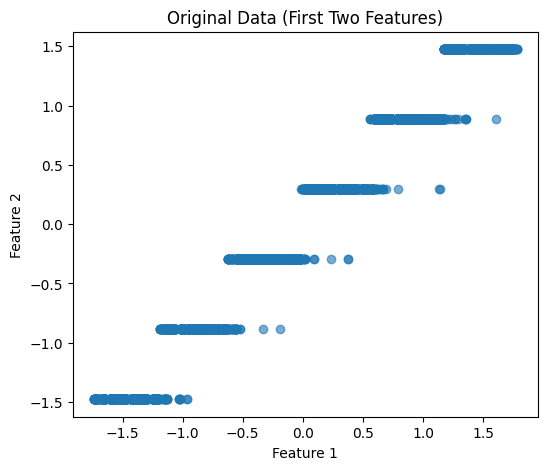

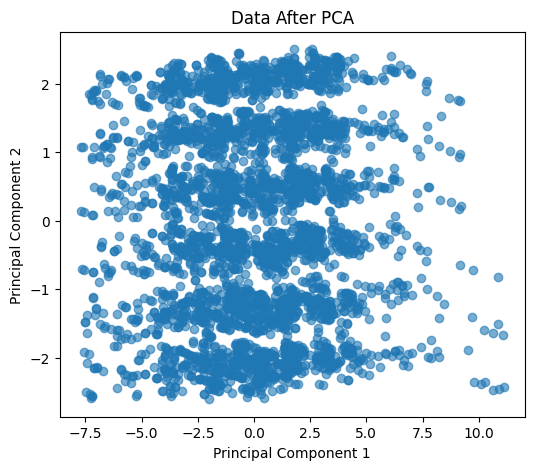

In [ ]:
# Plot original data just for the first 2 as requested 
plt.figure(figsize=(6, 5))
plt.scatter(standardized_data[:, 0], standardized_data[:, 1], alpha=0.6)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Original Data (First Two Features)")
plt.show()

# Plot reduced data after PCA
plt.figure(figsize=(6, 5))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], alpha=0.6)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Data After PCA")
plt.show()
